In [22]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plyt
import plotly.express as px
import geopandas as gpd
import folium

In [2]:
df = pd.read_csv('merged.csv')

print(df)

       longitude   latitude                  timestamp   xacc   yacc  speed  \
0     149.001999 -35.762268  2022-01-03T12:49:36+11:00 -0.622 -0.255   29.0   
1     149.054108 -35.326000  2020-07-01T12:17:01+10:00  1.394 -0.600   64.0   
2     149.063189 -35.320256  2023-01-25T17:32:38+11:00 -1.114  0.017   27.0   
3     149.062775 -35.320061  2021-06-23T17:33:19+10:00 -0.976  0.396   17.0   
4     149.062378 -35.313324  2021-03-04T08:55:16+11:00 -0.896  0.003   67.0   
...          ...        ...                        ...    ...    ...    ...   
6694  149.289459 -35.336906  2020-10-27T04:06:31+11:00 -0.112 -0.421   94.0   
6695  149.289154 -35.336918  2022-02-07T06:43:09+11:00 -0.078 -0.428   93.0   
6696  149.290756 -35.337002  2020-12-11T21:29:54+11:00 -0.409 -0.058   87.0   
6697  149.274216 -35.346287  2021-01-21T15:10:31+11:00 -0.057 -0.404  107.0   
6698  149.409001 -35.305583  2022-12-06T06:35:53+11:00 -0.180 -0.364   97.0   

      maxspeed  lanecount classification  
0       

In [3]:
df.head()

,longitude,latitude,timestamp,xacc,yacc,speed,maxspeed,lanecount,classification
0,149.001999,-35.762268,2022-01-03T12:49:36+11:00,-0.622,-0.255,29.0,62.0,1,Braking
1,149.054108,-35.326000,2020-07-01T12:17:01+10:00,1.394,-0.600,64.0,83.0,4,Steering
2,149.063189,-35.320256,2023-01-25T17:32:38+11:00,-1.114,0.017,27.0,48.0,2,Braking
3,149.062775,-35.320061,2021-06-23T17:33:19+10:00,-0.976,0.396,17.0,22.0,1,Braking
4,149.062378,-35.313324,2021-03-04T08:55:16+11:00,-0.896,0.003,67.0,95.0,2,Braking


In [4]:
df.classification.unique()

array(['Braking', 'Steering', 'Combined'], dtype=object)

In [5]:
df.lanecount.unique()

array([1, 4, 2, 3, 5, 6, 7], dtype=int64)

In [6]:
lanecountClass = df[["lanecount", "classification"]].copy()
lanecountClass

,lanecount,classification
0,1,Braking
1,4,Steering
2,2,Braking
3,1,Braking
4,2,Braking
...,...,...
6694,1,Steering
6695,1,Steering
6696,1,Braking
6697,2,Steering


In [23]:
df['xacc'].describe()

count    6699.000000
mean       -0.301323
std         0.340357
min        -1.962000
25%        -0.619000
50%        -0.257000
75%        -0.090000
max         1.714000
Name: xacc, dtype: float64

In [24]:
df['yacc'].describe()

count    6699.000000
mean        0.041516
std         0.488534
min        -1.096000
25%        -0.519000
50%         0.007000
75%         0.601000
max         1.052000
Name: yacc, dtype: float64

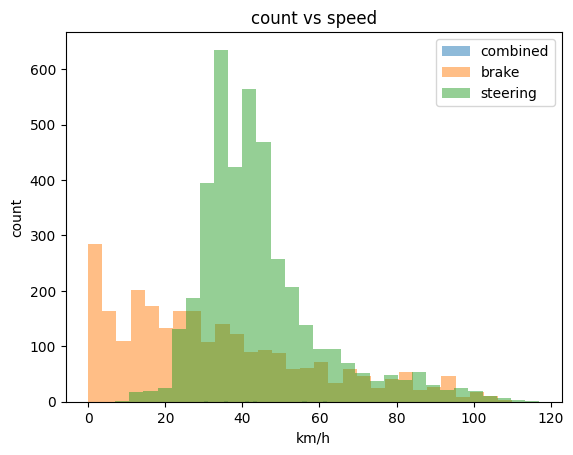

In [7]:
#occurences vs speed histogram, separated by classification
combined_speed_count = df[df["classification"] == "Combined"]
plyt.hist(combined_speed_count["speed"], bins=30, alpha=0.5, label="combined")

brake_speed_count = df[df["classification"] == "Braking"]
plyt.hist(brake_speed_count["speed"], bins=30, alpha=0.5, label="brake")

steering_speed_count = df[df["classification"] == "Steering"]
plyt.hist(steering_speed_count["speed"], bins=30, alpha=0.5, label="steering")

plyt.legend(loc="upper right")
plyt.title("count vs speed")
plyt.xlabel("km/h")
plyt.ylabel("count")
plyt.show()


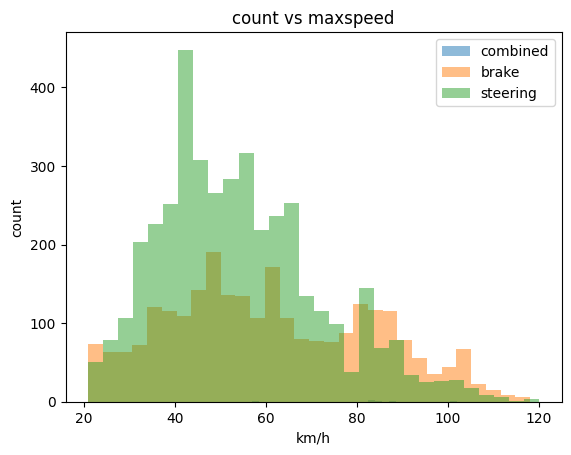

In [8]:
#occurences vs max speed histogram, separated by classification
combined_max_speed_count = df[df["classification"] == "Combined"]
plyt.hist(combined_speed_count["maxspeed"], bins=30, alpha=0.5, label="combined")

brake_max_speed_count = df[df["classification"] == "Braking"]
plyt.hist(brake_speed_count["maxspeed"], bins=30, alpha=0.5, label="brake")

steering_max_speed_count = df[df["classification"] == "Steering"]
plyt.hist(steering_speed_count["maxspeed"], bins=30, alpha=0.5, label="steering")

plyt.legend(loc="upper right")
plyt.title("count vs maxspeed")
plyt.xlabel("km/h")
plyt.ylabel("count")
plyt.show()

In [9]:
#xacc vs yacc
XYacc = px.scatter(df, x="xacc", y="yacc", color="classification", title="Xacc v Yacc")
XYacc.show()

In [10]:
#xacc vs yacc vs speed
def kmh_to_ms(x):
    return x / 3.6


df_converted = df.assign(speed_ms=lambda x: kmh_to_ms(x['speed']),
                         max_speed_ms=lambda x: kmh_to_ms(x['maxspeed']))

XYacc_Speed = px.scatter_3d(df_converted, x="xacc", y="yacc", z="speed_ms", color="classification", title="Xacc v Yacc v Speed")
XYacc_Speed.show()

In [11]:
#xacc vs yacc vs maxspeed
XYacc_Maxspeed = px.scatter_3d(df_converted, x="xacc", y="yacc", z="max_speed_ms", color="classification", title="Xacc v Yacc v Max Speed")
XYacc_Maxspeed.show()

In [43]:
#braking only (speed)
brake_xyacc_speed = px.scatter_3d(brake_speed_count, x="xacc", y="yacc", z="speed", color="speed", title="Xacc v Yacc v Speed (Brake)")
brake_xyacc_speed.show()

In [44]:
#steering only
steering_xyacc_speed = px.scatter_3d(steering_speed_count, x="xacc", y="yacc", z="speed", color="yacc", title="Xacc v Yacc v Speed (Steering)")
steering_xyacc_speed.show()

In [17]:
#load geojson data
road_reserve_geojson_data = gpd.read_file('ACTGOV_ROAD_RESERVES.geojson')

In [19]:
road_reserve_geojson_data.head()

,OBJECTID,ID,ROAD_ID,ROAD_NAME,HIERARCHY_ID,ROAD_HIERARCHY,DIVISION_CODE,DIVISION_NAME,DIVISION_SHORT,DISTRICT_CODE,DISTRICT_NAME,DISTRICT_SHORT,CURRENT_LIFECYCLE_STAGE,GlobalID,Shape__Area,Shape__Length,geometry
0,1,52078,2969,MAWSON DRIVE,7,URBAN DISTRIBUTOR,333.0,MAWSON,MAWS,3.0,WODEN VALLEY,WODE,GAZETTED,a29bd220-47a3-4666-aa60-648b9d78e13f,8330.097412,563.997962,"POLYGON ((149.10189 -35.36227, 149.10175 -35.3..."
1,2,52079,2969,MAWSON DRIVE,7,URBAN DISTRIBUTOR,333.0,MAWSON,MAWS,3.0,WODEN VALLEY,WODE,GAZETTED,3fea6088-7e9a-45d8-87bb-7bd21a28a963,2465.538818,214.168526,"POLYGON ((149.10311 -35.36264, 149.10305 -35.3..."
2,3,52080,4603,WILKINS STREET,8A,URBAN RESIDENTIAL 1,333.0,MAWSON,MAWS,3.0,WODEN VALLEY,WODE,GAZETTED,6d1b2b28-d29c-4339-829b-179af9bf64ef,6326.078857,516.156248,"POLYGON ((149.09855 -35.36795, 149.09909 -35.3..."
3,4,52081,4603,WILKINS STREET,8A,URBAN RESIDENTIAL 1,333.0,MAWSON,MAWS,3.0,WODEN VALLEY,WODE,GAZETTED,c0f4c860-864a-4581-a548-7ac7575484f4,3088.946533,280.652299,"POLYGON ((149.09953 -35.37120, 149.09928 -35.3..."
4,5,52082,2969,MAWSON DRIVE,7,URBAN DISTRIBUTOR,333.0,MAWSON,MAWS,3.0,WODEN VALLEY,WODE,GAZETTED,ac2bab1a-f6dc-4155-b1c1-ef8fc9bfe895,5748.540283,409.974189,"POLYGON ((149.10523 -35.36256, 149.10463 -35.3..."


In [20]:
road_edge_geojson_data = gpd.read_file('ACTGOV_ROAD_EDGES.geojson')

In [21]:
road_edge_geojson_data.head()

,OBJECTID,ID,ROAD_ID,ROAD_NAME,DIVISION_NAME,DIVISION_CODE,DIVISION_SHORT,DISTRICT_NAME,DISTRICT_CODE,DISTRICT_SHORT,EDGE_LIFECYLE_STAGE,ROAD_LIFECYCLE_STAGE,NAME_CURRENT_LIFECYCLE_STAGE,SEALED,SOURCE_SCALE,DATA_SOURCE,ENTRY_METHOD,GlobalID,Shape__Length,geometry
0,1,76465,NaN,NaN,ACTON,107.0,ACTO,CANBERRA CENTRAL,1,CANB,OPERATIONAL,NaN,NaN,NO,UNKNOWN,2016 AAM aerial photography,SCREEN DIGITISING,1f214f7c-8696-4677-bdba-dc75d75299b3,86.096512,"LINESTRING (149.11298 -35.28243, 149.11299 -35..."
1,2,76466,NaN,NaN,ACTON,107.0,ACTO,CANBERRA CENTRAL,1,CANB,OPERATIONAL,NaN,NaN,NO,UNKNOWN,2016 AAM aerial photography,SCREEN DIGITISING,a153e98b-ab6f-42da-8cb0-81c417c47e3c,100.817367,"LINESTRING (149.11312 -35.28246, 149.11311 -35..."
2,3,61916,NaN,NaN,NaN,NaN,NaN,STROMLO,10,STRO,OPERATIONAL,NaN,NaN,NO,UNKNOWN,RASTER,SCREEN DIGITISING,c4f0469e-bc48-41f9-9019-b2aa1dd47b33,651.061144,"LINESTRING (149.01099 -35.31147, 149.01101 -35..."
3,4,61917,NaN,NaN,NaN,NaN,NaN,STROMLO,10,STRO,OPERATIONAL,NaN,NaN,NO,UNKNOWN,RASTER,SCREEN DIGITISING,38c0fbea-12d0-4c51-ab41-30b24c7351a2,313.176921,"LINESTRING (149.00916 -35.30669, 149.00930 -35..."
4,5,61918,NaN,NaN,NaN,NaN,NaN,STROMLO,10,STRO,OPERATIONAL,NaN,NaN,NO,UNKNOWN,RASTER,SCREEN DIGITISING,ace1f2c6-cf16-46aa-806e-a7b0c651290f,110.781776,"LINESTRING (149.01051 -35.31240, 149.01060 -35..."


In [52]:
#get bound range
bounds1 = road_edge_geojson_data.total_bounds
bounds2 = road_reserve_geojson_data.total_bounds

#combine bounds
combined_bound = [min(bounds1[0], bounds2[0]), min(bounds1[1], bounds2[1]),
          max(bounds1[2], bounds2[2]), max(bounds1[3], bounds2[3])]

print(f'bounds1: {bounds1}')
print(f'bounds2: {bounds2}')
print(f'this is the combined bounds: {combined_bound}')

bounds1: [148.76361963 -35.89301064 149.39727619 -35.13952662]
bounds2: [121.48868763 -83.98975814 149.39777927 -35.13943525]
this is the combined bounds: [121.488687632489, -83.989758136275, 149.397779267416, -35.1394352544261]


In [59]:
#map centred around canberra
canberra_bounds = (-35.2809, 149.1300)
folium_map = folium.Map(location=canberra_bounds, zoom_start=12)
folium_map.save('map.html')
folium_map

In [64]:
#add geojson data to map
folium.GeoJson(road_edge_geojson_data).add_to(folium_map)
folium.GeoJson(road_reserve_geojson_data).add_to(folium_map)

In [65]:
folium_map.save('geomap.html')